In [208]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from itertools import product
import sympy as sym
from tqdm import tqdm

In [209]:
def mulM(A,B,type=np.float64):

    if len(np.shape(A)) == 1:
        A = np.reshape(A,(1,len(A)))

    if len(np.shape(B)) == 1:
        B = np.reshape(B,(len(B),1))

    AB = np.zeros(shape=(np.shape(A)[0],np.shape(B)[1]),dtype=type)

    if np.shape(A)[1] == np.shape(B)[0]:
        for i in range(np.shape(B)[1]):
            for j in range(np.shape(A)[0]):
                suma = 0
                for k in range(np.shape(A)[1]):
                    suma += A[j][k]*B[k][i]  
                AB[j][i] = suma
    else:
        AB = None
        print('Multiplicación no está definida')
    
    return AB

# Punto 3.

a)

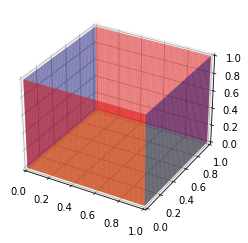

In [210]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

X, Y = np.meshgrid(x, y)

ax.plot_surface(X, np.zeros_like(X), Y, alpha=0.5, color='r')
ax.plot_surface(X, np.ones_like(X), Y, alpha=0.5, color='r')

ax.plot_surface(np.zeros_like(Y), X, Y, alpha=0.5, color='b')
ax.plot_surface(np.ones_like(Y), X, Y, alpha=0.5, color='b')

ax.plot_surface(X, Y, np.zeros_like(Y), alpha=0.5, color='y')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.show()

b)

Como es un cubo rectangular, entonces el área de una cara es la multiplicación de base*altura de esa cara en específico. Como un cubo tiene 6 caras en total y nos dicen que no consideremos la tapa superior, entonces al área superficial va a ser: xy + 2xz + 2yz = 12

In [211]:
x,y,z = sym.symbols('x y z',real=True)

# caras laterales
c1 = x*z
c2 = x*z
c3 = y*z
c4 = y*z
#fondo
c5 = x*y

area = c1 + c2 + c3 + c4 + c5 
ec = sym.Eq(area,12)
ec

Eq(x*y + 2*x*z + 2*y*z, 12)

c)

In [212]:
x = [1,1,1]
f = lambda x: x[0]*x[1]*x[2]*(-1)
r = ( {'type':'eq','fun': lambda x: x[0]*x[1] + 2*x[1]*x[2] + 2*x[0]*x[2] - 12} )

result = spo.minimize( f, x, constraints = r )
result

     fun: -4.000000340488772
     jac: array([-2.00000036, -2.00000036, -3.9999997 ])
 message: 'Optimization terminated successfully'
    nfev: 190
     nit: 38
    njev: 38
  status: 0
 success: True
       x: array([1.99999992, 1.99999998, 1.00000013])

d)

In [213]:
Vol = lambda x: x[0]*x[1]*x[2]
Vol(result.x)

4.000000340488772

El volumen máximo es de 4 cm^3

e)

Para usar el método de Multiplicadores de Lagrange, Hallaremos la raiz usando Newton-Raphson

In [214]:
x,y,z,l = sym.symbols('x y z lambda',real=True)
f = x*y*z*(-1)
r = x*y + 2*y*z + 2*x*z - 12
F = f + l*r
G = sym.Matrix([sym.diff(F,x),sym.diff(F,y),sym.diff(F,z),sym.diff(F,l)])
ex = sym.Eq(G,sym.Matrix([0,0,0,0]))
ex

Eq(Matrix([
[  lambda*(y + 2*z) - y*z],
[  lambda*(x + 2*z) - x*z],
[lambda*(2*x + 2*y) - x*y],
[x*y + 2*x*z + 2*y*z - 12]]), Matrix([
[0],
[0],
[0],
[0]]))

In [215]:
Gn = []
for i in G:
    Fi = sym.lambdify([x,y,z,l],i,'numpy')
    Gn.append(Fi)
Gn = np.array(Gn)

In [216]:
def GetF(G,r):
    
    n = r.shape[0]
    
    v = np.zeros_like(r)
    
    for i in range(n):
        v[i] = G[i](r[0],r[1],r[2],r[3])
        
    return v

def GetJacobian(f,r,h=1e-6):
    
    n = r.shape[0]
    
    J = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            
            rf = r.copy()
            rb = r.copy()
            
            rf[j] = rf[j] + h
            rb[j] = rb[j] - h
            
            J[i,j] = ( f[i](rf[0],rf[1],rf[2],rf[3]) - f[i](rb[0],rb[1],rb[2],rb[3])  )/(2*h)
            
    return J

def NewtonRaphson(G,r,itmax=1000,error=1e-9):
    
    it = 0
    d = 1.
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = r
        F = GetF(G,rc)
        J = GetJacobian(G,rc)
        InvJ = np.linalg.inv(J)
        r = rc - np.dot(InvJ,F)
        diff = r - rc
        d = np.max( np.abs(diff) )
        it += 1

    #print(it)
    return r

In [217]:
r0 = np.array([1.,2.,1.,2.])
x = NewtonRaphson(Gn,r0)
x

array([2. , 2. , 1. , 0.5])

In [218]:
Vol(x)

3.9999999999999996